In [1]:
import matplotlib.pyplot as plt
from VLC_init import *
from aoa_pos import *
from rtof_pos import *
from Roberts import *
import numpy as np
from matplotlib import pyplot as plt
from math import pi
from  scipy.interpolate import interp1d  

In [2]:
vlc_obj = VLC_init()

u=0.5     #x-position of the center
v=-5.    #y-position of the center
a=5.     #radius on the x-axis
b=5.5    #radius on the y-axis

t = np.linspace(pi, 2*pi, 100)  
x_data = u+a*np.cos(t)
y_data = v+b*np.sin(t)

# Interpolate values for x and y.
t2 = np.linspace(pi, 2*pi, 8)
# One-dimensional linear interpolation.
y2 = np.interp(t2, t, x_data)
x2 = np.interp(t2, t, y_data)

tx_cords = []
for i in range(len(x2)):
    tx_cords.append(((x2[i], y2[i]),(x2[i], y2[i] + 1)))

rx_cord = ((0, 0), (0, 1))

In [3]:
x_pose, y_pose, x_roberts, y_roberts, x_becha, y_becha = [], [], [], [], [], []
x, y = [], []
for i in range(len(tx_cords)):
    # updating the given coordinates
    print("Iteration #", i ,": ")
    vlc_obj.update_coords(tx_cords[i], rx_cord)
    vlc_obj.update_lookuptable()
    x.append(vlc_obj.trxpos)
    y.append(vlc_obj.trypos)
    # providing the environmentt to methods
    aoa = Pose(vlc_obj)
    rtof = RToF_pos(vlc_obj)
    tdoa = Roberts(vlc_obj)
    # making estimations
    tx_aoa = aoa.estimate()
    print("AoA finished")
    tx_rtof = rtof.estimate()
    print("RToF finished")
    tx_tdoa = tdoa.estimate()
    print("TDoA finished")
    # storing to plot later
    x_pose.append(tx_aoa[0])
    y_pose.append(tx_aoa[1])
    x_becha.append(tx_rtof[0])
    y_becha.append(tx_rtof[1])
    x_roberts.append(tx_tdoa[0])
    y_roberts.append(tx_tdoa[1])

Iteration # 0 : 
Transmitter-1 x pos is:  -5.001402263047115 , y pos is :  -5.001248556517762
Transmitter-2 x pos is :  -4.501343930885195 , y pos is :  -3.5009818640167136
AoA finished
RToF finished
TDoA finished
Iteration # 1 : 
Transmitter-1 x pos is:  -7.386117240348985 , y pos is :  -7.389214396312506
Transmitter-2 x pos is :  -4.004477838107172 , y pos is :  -3.006152973881428
AoA finished
RToF finished
TDoA finished
Iteration # 2 : 
Transmitter-1 x pos is:  -9.300701252342662 , y pos is :  -9.302744793807737
Transmitter-2 x pos is :  -2.6175117671717603 , y pos is :  -1.6177035495746868
AoA finished
RToF finished
TDoA finished
Iteration # 3 : 
Transmitter-1 x pos is:  -10.361015694858855 , y pos is :  -10.357243984321476
Transmitter-2 x pos is :  -0.6124514897495832 , y pos is :  0.38736438460244366
AoA finished
RToF finished
TDoA finished
Iteration # 4 : 
Transmitter-1 x pos is:  -10.363985043361065 , y pos is :  -10.361960354848678
Transmitter-2 x pos is :  1.612850996858115 ,

[array([-4.66134084, -5.28258615]), array([-7.15329649, -7.58513693]), array([-9.44493542, -9.15338103]), array([-10.34470799, -10.34542441]), array([-10.34470799, -10.33830155]), array([-9.44493542, -9.41644132]), array([-7.15329649, -7.5747021 ]), array([-4.66134084, -5.09390723])]


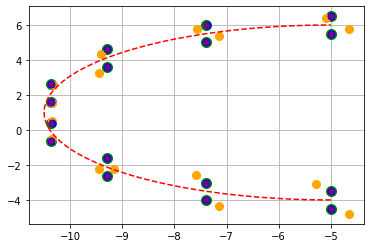

In [7]:
print(x_becha)

plt.figure()
plt.plot(x, y,'o', color='green', markersize=10)
plt.plot(x_becha, y_becha, 'o', color='orange', markersize=8)
plt.plot(x_pose, y_pose, 'o', color='blue', markersize=7)
plt.plot(x_roberts, y_roberts, 'o', color='purple', markersize=5)
plt.plot(y_data, x_data+0.5, '--', color='red', markersize=5)
plt.grid()